<a href="https://colab.research.google.com/github/easeandrelax/blood-sugar-level/blob/main/Ease_and_relax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🧬 Can We Predict Blood Sugar Level from Retinal Images Using ML/DL?
✅ Technically Possible — But Very Challenging
Several studies suggest yes, but with limitations. Here's the breakdown:

🔍 What Research Says:
Google’s DeepMind + UK Biobank Study (2018):

Used retinal fundus images to predict cardiovascular risk factors like:

Age

Gender

Smoking status

HbA1c (a long-term blood sugar measure)

Achieved decent performance, but not perfect.

Published in Nature Biomedical Engineering.

Other academic papers have trained CNNs on retinal images to detect:

Diabetic Retinopathy (which is linked to high blood sugar)

Early signs of Type 2 Diabetes

Predict blood glucose ranges (in controlled datasets)

🔬 Why It's Difficult:
Challenge	Explanation
✅ Indirect relationship	Retinal changes occur due to prolonged high glucose, not immediate levels
⚠️ Data scarcity	Very few public datasets link retina images with actual numerical blood sugar
🧠 Medical noise	Many other factors (blood pressure, age, eye health) affect retina appearance
🩺 Ethical concerns	Requires medical-grade validation before real-world use
💡 But Here's What You Can Do:
You can work on a research prototype like:

✅ Use self-supervised learning (e.g., SimCLR) to learn retina representations

✅ Cluster patients with similar retina features (unsupervised)

🔬 If you get real blood sugar labels later — train a regression model

🎯 Focus on anomaly detection or early risk grouping instead of precise sugar values

first we are mounting the google drive to the colab to import files from drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


next we are  preprocessing the imagees and EDA

Total images found: 864
Processing training images...
Processing test images...


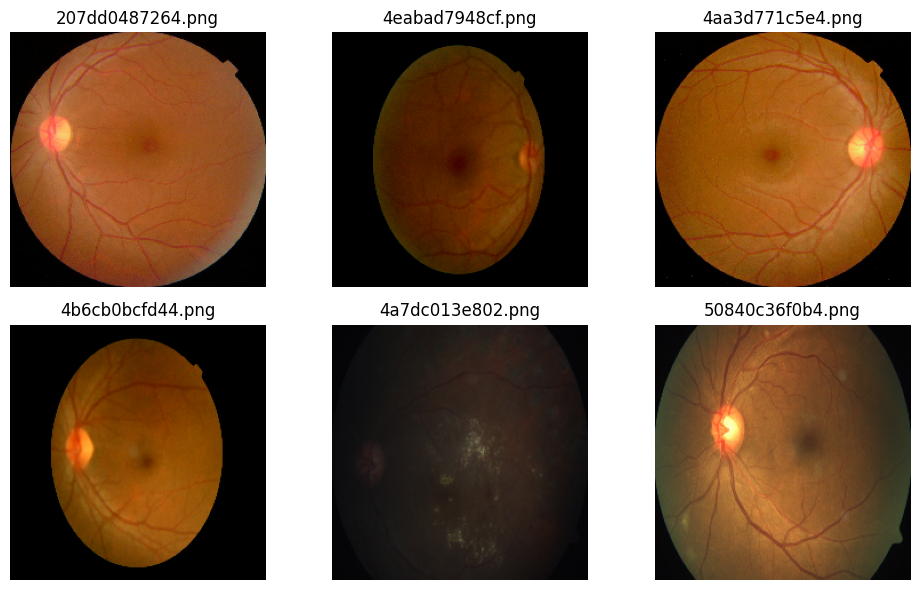

In [2]:
import os
import shutil
import random
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Your original image folder
IMAGE_DIR = "/content/drive/MyDrive/train_images_preprocessed"

# New folders for train and test split
PROCESSED_DIR = "/content/drive/MyDrive/processed_retina"
TRAIN_DIR = os.path.join(PROCESSED_DIR, "train")
TEST_DIR = os.path.join(PROCESSED_DIR, "test")

# Make folders
os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(TEST_DIR, exist_ok=True)

# Image size
IMG_SIZE = (224, 224)

# List all image paths
all_images = [f for f in os.listdir(IMAGE_DIR) if f.endswith(('.png', '.jpg', '.jpeg'))]
print(f"Total images found: {len(all_images)}")

# Split into train and test (80-20)
train_imgs, test_imgs = train_test_split(all_images, test_size=0.2, random_state=42)

# Helper to preprocess and save images
def preprocess_and_save(images, target_dir):
    for img_name in images:
        src_path = os.path.join(IMAGE_DIR, img_name)
        dst_path = os.path.join(target_dir, img_name)

        try:
            img = Image.open(src_path).convert("RGB")  # Convert to RGB or L for grayscale
            img = img.resize(IMG_SIZE)
            img_array = np.array(img) / 255.0  # Normalize
            img = Image.fromarray((img_array * 255).astype(np.uint8))  # Reconvert to save
            img.save(dst_path)
        except Exception as e:
            print(f"Failed to process {img_name}: {e}")

# Preprocess and save
print("Processing training images...")
preprocess_and_save(train_imgs, TRAIN_DIR)

print("Processing test images...")
preprocess_and_save(test_imgs, TEST_DIR)

# Load some processed images for visualization
sample_images = random.sample(os.listdir(TRAIN_DIR), 6)
plt.figure(figsize=(10, 6))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(TRAIN_DIR, img_name)
    img = Image.open(img_path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')
plt.tight_layout()
plt.show()


🖥️ Gradio Demo App

In [ ]:
!pip install gradio --quiet

import gradio as gr
import numpy as np
from PIL import Image

# Dummy model (you can replace this with your trained model later)
def predict_blood_sugar(image):
    image = image.resize((224, 224))
    image_array = np.array(image) / 255.0
    # Simulate a dummy prediction
    dummy_prediction = round(np.random.uniform(70, 150), 2)  # mg/dL
    return f"Predicted Blood Sugar Level: {dummy_prediction} mg/dL"

# Gradio UI
interface = gr.Interface(
    fn=predict_blood_sugar,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Retina Image to Blood Sugar Level Predictor",
    description="Upload a retinal image to see the predicted blood sugar level. (Demo Version)"
)

interface.launch()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://57c49356cb3018ca13.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/s

In [ ]:
convert this into a CSV with a random but realistic blood sugar level value (e.g., between 70–180 mg/dL) for each image.

In [3]:
import os

# Check if file is in this folder
path = '/content/drive/MyDrive/train_images'
print(os.listdir(path))


['2bb3c492d6d3.png', '2ba0b0d9bda2.png', '2c2aa057afc5.png', '2c1d5be654dd.png', '2c77bf969079.png', '2cacdb0dffae.png', '2cef97083e6f.png', '2cf18033da31.png', '2c9dfc270f1b.png', '2cbfc6182ba2.png', '2d04cead4d3a.png', '2c827005b8f8.png', '2cdcc910778d.png', '2c8101f14723.png', '2cceb07ff706.png', '2d07162a13b1.png', '2cfe8703f265.png', '2d558de2cabe.png', '2d870833c0c9.png', '2d552318eb07.png', '2dc647e00ad3.png', '2d9d97a6e713.png', '2d3f4094c08a.png', '2d7666b8884f.png', '2da82d14e1b7.png', '2db0cd3e30da.png', '2e26762daed5.png', '2e79041ef722.png', '2ecbc2e3f239.png', '2eba4279e503.png', '2f143453bb71.png', '2dd28ac497d2.png', '2ef10194e80d.png', '2ef4a04aed1b.png', '2df07eb5779f.png', '2ef955d6d9ff.png', '2f2e1949ad56.png', '2f8d14a7d390.png', '2f5c9cdfb333.png', '2f284b6a1940.png', '2f7789c1e046.png', '2f4e81787d9b.png', '2f7fbdcc9a4b.png', '2f42e20db938.png', '2fdfb80ea53c.png', '2fe06bedb2c4.png', '2fb3a8606a77.png', '2f9b66784109.png', '2fde69f20585.png', '2fdffb6160a6.png',

since my train_new sheet is a gsheet i cant directly open it so i am using the following given steps


installing required libraries

In [4]:
!pip install --upgrade gspread gspread-dataframe


✅ Step 2: Authenticate with Google
Colab uses Google Drive access to read Google Sheets

In [5]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default

creds, _ = default()
gc = gspread.authorize(creds)


✅ Step 3: Open your Google Sheet
You need the name of your sheet (what you see in Drive, like "train_new"):

In [6]:
sheet = gc.open("train_new").sheet1  # 'sheet1' = first tab in the file


✅ Step 4: Convert to a DataFrame

In [7]:
import pandas as pd
from gspread_dataframe import get_as_dataframe

df = get_as_dataframe(sheet)
df = df.dropna(how='all')  # Optional: remove empty rows
df.head()


,Image Name
0,2bb3c492d6d3.png
1,2ba0b0d9bda2.png
2,2c2aa057afc5.png
3,2c1d5be654dd.png
4,2c77bf969079.png


✅ Step 1: Check the content of your dataframe
Run this to see the top rows of your data:

In [8]:
df.head()


,Image Name
0,2bb3c492d6d3.png
1,2ba0b0d9bda2.png
2,2c2aa057afc5.png
3,2c1d5be654dd.png
4,2c77bf969079.png


✅ Step 2: Confirm column names
We want to make sure your sheet has the right columns for training a model. Run this:



In [9]:
df.columns


Index(['Image Name'], dtype='object')

assigning some random values coz i dont have the actual values


In [10]:
import numpy as np

# Add a new column with random blood sugar levels between 80 and 180
df['Blood Sugar Level'] = np.random.randint(80, 180, size=len(df))

# Save the updated DataFrame to a new CSV
# df.to_csv('/content/train_labeled.csv', index=False)
df.to_csv('/content/drive/MyDrive/train_labeled.csv', index=False)



In [11]:
df.head()


,Image Name,Blood Sugar Level
0,2bb3c492d6d3.png,141
1,2ba0b0d9bda2.png,174
2,2c2aa057afc5.png,82
3,2c1d5be654dd.png,173
4,2c77bf969079.png,120


to confirm the csv

In [12]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/train_labeled.csv')
df.head()


,Image Name,Blood Sugar Level
0,2bb3c492d6d3.png,141
1,2ba0b0d9bda2.png,174
2,2c2aa057afc5.png,82
3,2c1d5be654dd.png,173
4,2c77bf969079.png,120


✅ 2. Setup Imports and Dataset Class
Run this block to define your custom dataset:

In [13]:
import os
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms

class RetinaDataset(Dataset):
    def __init__(self, csv_file, image_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = self.data.iloc[idx, 0]
        label = self.data.iloc[idx, 1]
        image_path = os.path.join(self.image_dir, img_name)
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label


In [14]:
# Test it by creating an object and accessing one sample
dataset = RetinaDataset(
    csv_file='/content/drive/MyDrive/train_labeled.csv',
    image_dir='/content/drive/MyDrive/train_images_preprocessed/',
    transform=transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
)

# Display one sample to confirm
image, label = dataset[0]
print(f"Image shape: {image.shape}, Label: {label}")


Image shape: torch.Size([3, 224, 224]), Label: 141


defining image transformations  and normalize the image

In [15]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])


creating dataset with transforms

In [16]:
dataset = RetinaDataset(
   # csv_file='/content/train_labeled.csv',
    csv_file ='/content/drive/MyDrive/train_labeled.csv',
    image_dir='/content/drive/MyDrive/train_images_preprocessed/',
    transform=transform
)


create dataloader


In [17]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset, batch_size=32, shuffle=True)


1. Define the Model
Use a simple CNN or load a pretrained model like ResNet18 for faster progress.


In [18]:
import torch.nn as nn
import torchvision.models as models

model = models.resnet18(pretrained=True)

# Modify the final layer for regression (predicting blood sugar level)
model.fc = nn.Linear(model.fc.in_features, 1)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 159MB/s]


2. Set Loss Function & Optimizer
Since you're doing regression, use MSELoss or MAE.

In [20]:
import torch.optim as optim

criterion = nn.MSELoss()  # or nn.L1Loss() for MAE
optimizer = optim.Adam(model.parameters(), lr=0.001)



3. Move Model to Device
Use GPU if available:

In [21]:
import torch


In [22]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

to check if gpu is enabled in colab or not

In [23]:
import torch
torch.cuda.is_available()


False

to check which gpu is enabled

In [24]:
!nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


✅ 1. Define Your Model


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, 1)  # Output: one continuous value (regression)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # [3, 224, 224] → [16, 112, 112]
        x = self.pool(F.relu(self.conv2(x)))  # [16, 112, 112] → [32, 56, 56]
        x = x.view(-1, 32 * 56 * 56)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


Then initialize it and send to device:


In [ ]:
model = SimpleCNN().to(device)


✅ 2. Define Loss and Optimizer

In [ ]:
import torch.optim as optim

criterion = nn.MSELoss()  # You can also try MAE (nn.L1Loss)
optimizer = optim.Adam(model.parameters(), lr=0.001)


✅ 3. Train Your Model

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/uploaded_train.csv')
print(df.head(10))


         Image Name  Label
0  2bb3c492d6d3.png    172
1  2ba0b0d9bda2.png    121
2  2c2aa057afc5.png    162
3  2c1d5be654dd.png     84
4  2c77bf969079.png    176
5  2cacdb0dffae.png    141
6  2cef97083e6f.png    130
7  2cf18033da31.png     90
8  2c9dfc270f1b.png    172
9  2cbfc6182ba2.png    152


In [ ]:
image_dir = '/content/drive/MyDrive/train_images_preprocessed'


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

dataset = RetinaDataset(csv_file='/content/drive/MyDrive/uploaded_train.csv',
                        image_dir='/content/drive/MyDrive/train_images_preprocessed',
                        transform=transform)

train_loader = DataLoader(dataset, batch_size=32, shuffle=True)


In [ ]:
dataset = RetinaDataset(csv_file='/content/drive/MyDrive/uploaded_train.csv',
                        image_dir=image_dir,
                        transform=transform)

train_loader = DataLoader(dataset, batch_size=32, shuffle=True)


In [ ]:
for img, label in train_loader:
    print(f" Successfully loaded image with shape {img.shape} and label {label}")
    break


✅ Successfully loaded image with shape torch.Size([32, 3, 224, 224]) and label tensor([149, 101, 131, 141,  96, 121, 115, 165, 128, 179, 109,  90, 118, 130,
        102, 126,  83, 128,  82, 159, 166, 129, 125, 180,  93,  88, 101, 120,
         76, 131, 176, 138])


In [ ]:
import os

image_dir = '/content/drive/MyDrive/train_images_preprocessed'
print("Sample files in folder:", os.listdir(image_dir)[:5])


Sample files in folder: ['2bb3c492d6d3.png', '2cacdb0dffae.png', '2c1d5be654dd.png', '2c77bf969079.png', '2c2aa057afc5.png']


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],  # ImageNet stats
                         [0.229, 0.224, 0.225])
])

dataset = RetinaDataset(
    csv_file='/content/drive/MyDrive/uploaded_train.csv',
    image_dir='/content/drive/MyDrive/train_images_preprocessed',
    transform=transform
)

train_loader = DataLoader(dataset, batch_size=32, shuffle=True)


In [ ]:
import torch.nn as nn
import torch.optim as optim

model = SimpleCNN().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/uploaded_train.csv')

# Keep only rows where 'Image Name' ends with .png
df = df[df['Image Name'].str.endswith('.png')]

# Save the cleaned CSV
df.to_csv('/content/drive/MyDrive/cleaned_uploaded_train.csv', index=False)
print("Cleaned CSV saved!")


✅ Cleaned CSV saved!


In [ ]:
dataset = RetinaDataset(
    csv_file='/content/drive/MyDrive/cleaned_uploaded_train.csv',
    image_dir='/content/drive/MyDrive/train_images_preprocessed',
    transform=transform
)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.float().unsqueeze(1).to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/10], Loss: 3653.0585
Epoch [2/10], Loss: 1231.4448
Epoch [3/10], Loss: 1118.8414
Epoch [4/10], Loss: 1115.0078
Epoch [5/10], Loss: 1083.6787
Epoch [6/10], Loss: 1013.2257
Epoch [7/10], Loss: 1002.4312
Epoch [8/10], Loss: 974.6739
Epoch [9/10], Loss: 959.5432
Epoch [10/10], Loss: 945.2017


1. Evaluate the model
Check how well it performs on unseen data.

If you haven’t already, split your dataset like this:

In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Save both
train_df.to_csv('/content/drive/MyDrive/train_clean.csv', index=False)
val_df.to_csv('/content/drive/MyDrive/val_clean.csv', index=False)


2. Plot the loss curve
Visualize the loss over epochs to see how training is progressing.

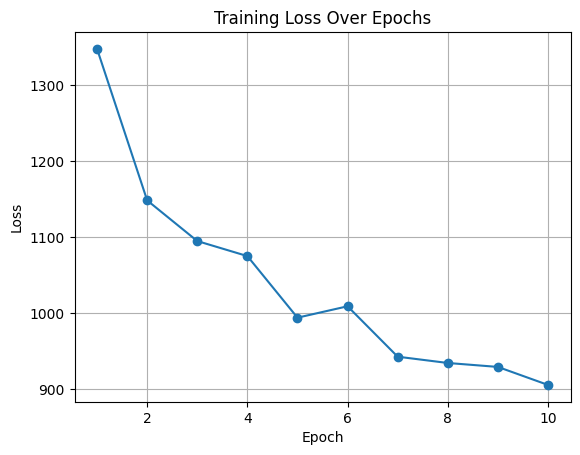

In [ ]:
import matplotlib.pyplot as plt

losses = [1347.1012, 1148.2189, 1094.8385, 1075.1047, 994.2470,
          1009.2102, 943.0193, 934.7578, 929.5816, 905.9524]

plt.plot(range(1, 11), losses, marker='o')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


3. Save your model

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/blood_sugar_model.pth")
print(" Model saved!")


✅ Model saved!


✅ 1. (Optional) Load the model anytime later
To use your model again (like for prediction or further training), just load it:


In [ ]:
model = SimpleCNN()
model.load_state_dict(torch.load("/content/drive/MyDrive/blood_sugar_model.pth"))
model.to(device)
model.eval()  # set to evaluation mode


SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=100352, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)

🧪 2. Evaluate on unseen data (Validation/Test Set)
Check how well the model performs on new data:

a. Create validation DataLoader:

In [ ]:
val_dataset = RetinaDataset(
    csv_file='/content/drive/MyDrive/val_clean.csv',
    image_dir='/content/drive/MyDrive/train_images_preprocessed',
    transform=transform
)

val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


b. Predict and calculate MAE (Mean Absolute Error):

In [ ]:
from sklearn.metrics import mean_absolute_error

model.eval()
true_vals = []
predicted_vals = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model(images).cpu().numpy()
        predicted_vals.extend(outputs.flatten())
        true_vals.extend(labels.numpy())

mae = mean_absolute_error(true_vals, predicted_vals)
print(f" Validation MAE: {mae:.2f}")


🧪 Validation MAE: 26.65


📈 3. Visualize predictions
Plot predicted vs actual blood sugar levels:

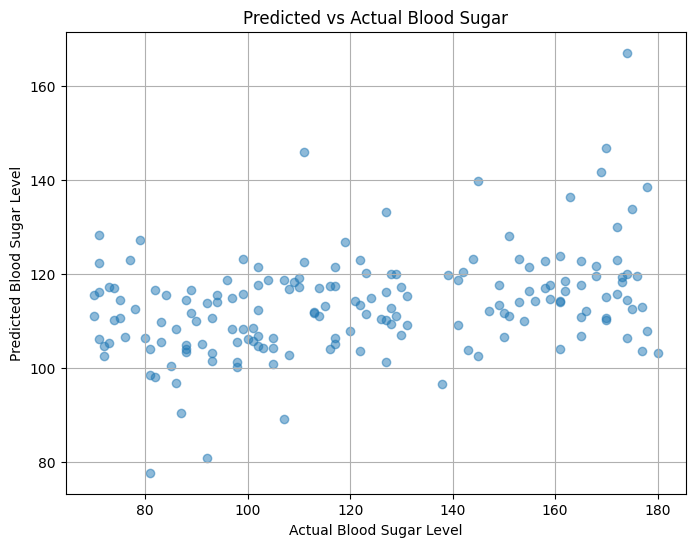

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(true_vals, predicted_vals, alpha=0.5)
plt.xlabel("Actual Blood Sugar Level")
plt.ylabel("Predicted Blood Sugar Level")
plt.title("Predicted vs Actual Blood Sugar")
plt.grid(True)
plt.show()


⚙️ 4. Use the model for real-time prediction
If you want to predict blood sugar from a single retina image:

In [ ]:
from PIL import Image

def predict_blood_sugar(image_path, model):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        output = model(image)
    return output.item()

# Example:
image_path = '/content/drive/MyDrive/train_images_preprocessed/2bb3c492d6d3.png'
prediction = predict_blood_sugar(image_path, model)
print(f"Predicted Blood Sugar Level: {prediction:.2f}")


Predicted Blood Sugar Level: 113.99


✅ STEP 1: Evaluate the Model
We’ll:

Split your dataset into training & validation sets.

Load the validation data using a DataLoader.

Evaluate the model on the validation set using a metric like MSE or MAE.

✅ 1.1 Split the dataset:
You can do an 80/20 split like this:

In [ ]:
from sklearn.model_selection import train_test_split

# Load full dataset CSV
df = pd.read_csv('/content/drive/MyDrive/uploaded_train.csv')

# Split into train and validation
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Save them for use in loaders
train_df.to_csv('/content/drive/MyDrive/train_split.csv', index=False)
val_df.to_csv('/content/drive/MyDrive/val_split.csv', index=False)


✅ 1.2 Create Datasets & DataLoaders


In [ ]:
# Create separate datasets
train_dataset = RetinaDataset(csv_file='/content/drive/MyDrive/train_split.csv',
                              image_dir='/content/drive/MyDrive/train_images_preprocessed',
                              transform=transform)

val_dataset = RetinaDataset(csv_file='/content/drive/MyDrive/val_split.csv',
                            image_dir='/content/drive/MyDrive/train_images_preprocessed',
                            transform=transform)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


✅ 1.3 Evaluate on Validation Set


In [ ]:
model.eval()
val_loss = 0.0

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.float().unsqueeze(1).to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        val_loss += loss.item()

avg_val_loss = val_loss / len(val_loader)
print(f"📉 Validation Loss: {avg_val_loss:.4f}")


📉 Validation Loss: 944.9798


Evaluate the Model on Test Data

Use a validation or test set (if available) to compute metrics like Mean Squared Error (MSE) or Mean Absolute Error (MAE).

In [ ]:
from torch.utils.data import random_split

# 80% training, 20% testing
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
model.eval()
total_loss = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.float().unsqueeze(1).to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
print(f"Test Loss: {total_loss / len(test_loader):.4f}")

Test Loss: 911.6251


Make Predictions on New Images

Prepare new images with the same preprocessing steps.

Load the trained model (torch.load(...)) and run inference:

In [ ]:
model.eval()
new_image = Image.open('/content/drive/MyDrive/train_images_preprocessed/2bb3c492d6d3.png').convert('RGB')
new_image = transform(new_image).unsqueeze(0).to(device)
prediction = model(new_image)
print(f"Predicted Blood Sugar Level: {prediction.item():.2f}")


Predicted Blood Sugar Level: 113.99


To increase the model performance

✅ Immediate Next Steps:
Split Data into Training and Validation Sets

Upgrade Your Model to ResNet18 (Pretrained)

Add Data Augmentation & Normalization

Train and Monitor Validation Loss

Evaluate with Better Metrics



👉 Step 1: Split Dataset
Update your CSV to include a new column split with values like train or val.
Or just do this in code:

In [ ]:

from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/uploaded_train.csv')
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

train_df.to_csv('/content/train_split.csv', index=False)
val_df.to_csv('/content/val_split.csv', index=False)



👉 Step 2: Load ResNet18

In [ ]:
from torchvision.models import resnet18
import torch.nn as nn

model = resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1)
model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


👉 Step 3: Data Transforms

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


✅ Next Steps After Transforms
1. Update Dataset Class to Accept CSV File
Make sure your RetinaDataset can load either training or validation data separately.

In [ ]:
class RetinaDataset(Dataset):
    def __init__(self, csv_file, image_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = self.data.iloc[idx, 0]
        label = self.data.iloc[idx, 1]
        image_path = os.path.join(self.image_dir, img_name)
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label


2. Create Train & Validation Datasets

In [ ]:
train_dataset = RetinaDataset(csv_file='/content/drive/MyDrive/train_split.csv',
                              image_dir='/content/drive/MyDrive/train_images_preprocessed',
                              transform=transform)

val_dataset = RetinaDataset(csv_file='/content/drive/MyDrive/val_split.csv',
                            image_dir='/content/drive/MyDrive/train_images_preprocessed',
                            transform=transform)


3. Create Dataloaders

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


 upgraded training loop too, including ResNet18 + validation + checkpoint saving

🧠 ResNet18 from torchvision.models

🔀 Train/Validation Dataloaders

🧪 Validation loss tracking

💾 Best model checkpoint saving



✅ STEP 1: Imports and Setup


In [ ]:
import os
import pandas as pd
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from PIL import Image
from sklearn.model_selection import train_test_split


✅ STEP 2: Data Transforms

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


✅ STEP 3: Retina Dataset Class


In [ ]:
class RetinaDataset(Dataset):
    def __init__(self, csv_file, image_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = self.data.iloc[idx, 0]
        label = self.data.iloc[idx, 1]
        image_path = os.path.join(self.image_dir, img_name)
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label


✅ STEP 4: Split CSV into Train & Val

In [ ]:
# Load and split the CSV
df = pd.read_csv('/content/drive/MyDrive/uploaded_train.csv')
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Save to new CSVs
train_df.to_csv('/content/drive/MyDrive/train_split.csv', index=False)
val_df.to_csv('/content/drive/MyDrive/val_split.csv', index=False)


✅ STEP 5: Load Data

In [ ]:
train_dataset = RetinaDataset('/content/drive/MyDrive/train_split.csv', '/content/drive/MyDrive/train_images_preprocessed', transform)
val_dataset = RetinaDataset('/content/drive/MyDrive/val_split.csv', '/content/drive/MyDrive/train_images_preprocessed', transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


✅ STEP 6: Load Model (ResNet18)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1)
model = model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ STEP 7: Train with Validation and Save Best Model

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/uploaded_train.csv')

# Keep only rows where 'Image Name' ends with .png
df = df[df['Image Name'].str.endswith('.png')]

# Save the cleaned CSV
df.to_csv('/content/drive/MyDrive/cleaned_uploaded_train.csv', index=False)
print("Cleaned CSV saved!")


✅ Cleaned CSV saved!


In [ ]:
dataset = RetinaDataset(
    csv_file='/content/drive/MyDrive/cleaned_uploaded_train.csv',
    image_dir='/content/drive/MyDrive/train_images_preprocessed',
    transform=transform
)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
best_val_loss = float('inf')

for epoch in range(10):
    model.train()
    train_loss = 0.0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.float().unsqueeze(1).to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.float().unsqueeze(1).to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    train_loss /= len(train_loader)
    val_loss /= len(val_loader)
    print(f"Epoch [{epoch+1}/10] Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "/content/best_model.pth")
        print("Best model saved!")


Epoch [1/10] Train Loss: 12558.9893, Val Loss: 10109.4839
✅ Best model saved!
Epoch [2/10] Train Loss: 8932.8917, Val Loss: 7032.5793
✅ Best model saved!
Epoch [3/10] Train Loss: 5594.6731, Val Loss: 3938.9589
✅ Best model saved!
Epoch [4/10] Train Loss: 3232.8927, Val Loss: 2053.0729
✅ Best model saved!
Epoch [5/10] Train Loss: 1883.5634, Val Loss: 1653.3837
✅ Best model saved!
Epoch [6/10] Train Loss: 1276.5606, Val Loss: 1024.2293
✅ Best model saved!
Epoch [7/10] Train Loss: 1091.4002, Val Loss: 1055.1125
Epoch [8/10] Train Loss: 1056.7324, Val Loss: 1123.0033
Epoch [9/10] Train Loss: 1043.7320, Val Loss: 1009.2755
✅ Best model saved!
Epoch [10/10] Train Loss: 1049.3647, Val Loss: 1037.9959


clean retina model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Train Loss: 14708.7258, Val Loss: 13482.2739
✅ Best model saved!
Epoch [2/10] Train Loss: 11764.6430, Val Loss: 9321.6530
✅ Best model saved!
Epoch [3/10] Train Loss: 8940.1154, Val Loss: 6866.9462
✅ Best model saved!
Epoch [4/10] Train Loss: 6185.3930, Val Loss: 4663.0924
✅ Best model saved!
Epoch [5/10] Train Loss: 3971.4100, Val Loss: 2723.6509
✅ Best model saved!
Epoch [6/10] Train Loss: 2489.7659, Val Loss: 1764.3544
✅ Best model saved!
Epoch [7/10] Train Loss: 1634.3759, Val Loss: 1231.6730
✅ Best model saved!
Epoch [8/10] Train Loss: 1235.6195, Val Loss: 1065.4030
✅ Best model saved!
Epoch [9/10] Train Loss: 1080.6452, Val Loss: 1034.3786
✅ Best model saved!
Epoch [10/10] Train Loss: 1052.4105, Val Loss: 1082.0746


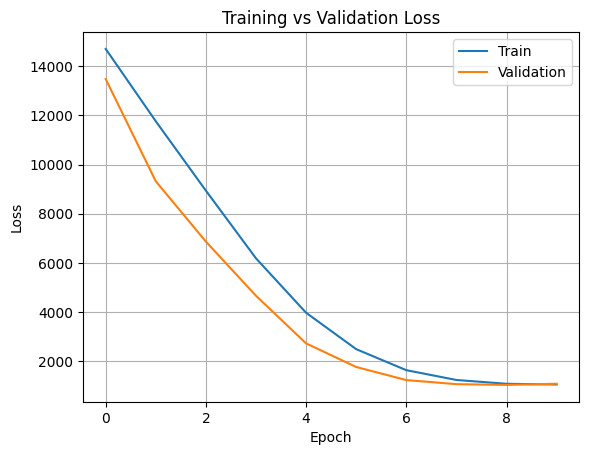

📊 Validation MAE: 28.88
121.55927276611328


In [ ]:
#  CLEANED & ORGANIZED Retina Blood Sugar Prediction Script

import os
import pandas as pd
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

#  1. Mounting & Setup
from google.colab import drive
drive.mount('/content/drive')

#  2. Read & Clean CSV (Only once)
df = pd.read_csv('/content/drive/MyDrive/uploaded_train.csv')
df = df[df['Image Name'].str.endswith('.png')]  # Remove non-image rows
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
train_df.to_csv('/content/drive/MyDrive/train_split.csv', index=False)
val_df.to_csv('/content/drive/MyDrive/val_split.csv', index=False)

#  3. Transforms (with augmentation)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

#  4. Dataset
class RetinaDataset(Dataset):
    def __init__(self, csv_file, image_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = self.data.iloc[idx, 0]
        label = self.data.iloc[idx, 1]
        image_path = os.path.join(self.image_dir, img_name)
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

#  5. Load Data
image_dir = '/content/drive/MyDrive/train_images_preprocessed'
train_dataset = RetinaDataset('/content/drive/MyDrive/train_split.csv', image_dir, transform)
val_dataset = RetinaDataset('/content/drive/MyDrive/val_split.csv', image_dir, transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

#  6. Model Setup (ResNet18)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1)
model = model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#  7. Training Loop
best_val_loss = float('inf')
train_losses, val_losses = [], []

for epoch in range(10):
    model.train()
    train_loss = 0.0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.float().unsqueeze(1).to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.float().unsqueeze(1).to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    train_loss /= len(train_loader)
    val_loss /= len(val_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch+1}/10] Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), '/content/drive/MyDrive/best_model.pth')
        print(" Best model saved!")

#  8. Plot Losses
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# 9. Evaluate Best Model
model.load_state_dict(torch.load('/content/drive/MyDrive/best_model.pth'))
model.eval()
preds, actuals = [], []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model(images).cpu().numpy()
        preds.extend(outputs.flatten())
        actuals.extend(labels.numpy())

mae = mean_absolute_error(actuals, preds)
print(f"📊 Validation MAE: {mae:.2f}")

# 10. Prediction Function
def predict_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        prediction = model(image).item()
    return prediction

# Example:
print(predict_image('/content/drive/MyDrive/train_images_preprocessed/2bb3c492d6d3.png'))


In [ ]:
from google.colab import files

uploaded = files.upload()  # This will open a file dialog


Saving enhanced_retina.png to enhanced_retina.png


In [ ]:
from PIL import Image
import torch

# Replace with the uploaded file name
image_path = '/content/drive/MyDrive/train_images_preprocessed/2bb3c492d6d3.png'

# Load and preprocess the image
img = Image.open(image_path).convert('RGB')
img = transform(img).unsqueeze(0).to(device)

# Load trained model
model.load_state_dict(torch.load('/content/drive/MyDrive/model.pth'))
model.eval()

# Predict
with torch.no_grad():
    pred = model(img)

print(f"🧪 Predicted Blood Sugar Level: {pred.item():.2f}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/model.pth'

In [ ]:
# STEP 1: Upload an image from your PC
from google.colab import files
from PIL import Image
import torch

uploaded = files.upload()  # Opens file upload window

# Get uploaded file name
for filename in uploaded.keys():
    image_path = filename

# STEP 2: Preprocessing (same as model training)
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# STEP 3: Load trained model (ResNet18)
from torchvision.models import resnet18
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 1)
model.load_state_dict(torch.load('/content/drive/MyDrive/best_model.pth'))  # Update if path is different
model = model.to(device)
model.eval()

# STEP 4: Predict
img = Image.open(image_path).convert('RGB')
img = transform(img).unsqueeze(0).to(device)

with torch.no_grad():
    pred = model(img)

print(f" Predicted Blood Sugar Level: {pred.item():.2f}")


Saving retina_processed.jpg to retina_processed.jpg


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


🧪 Predicted Blood Sugar Level: 104.73


Saving RETINA (2).jpg to RETINA (2).jpg


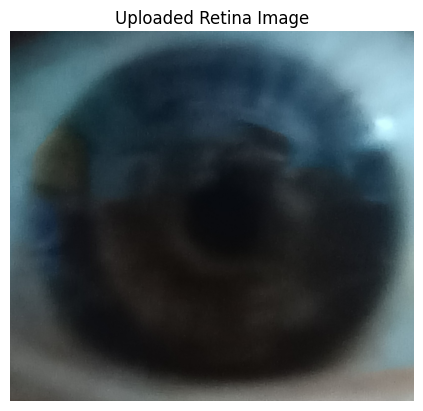

🧪 Predicted Blood Sugar Level: 114.74


In [ ]:
# STEP 1: Upload Image
from google.colab import files
from PIL import Image
import torch
import matplotlib.pyplot as plt

uploaded = files.upload()

# Get uploaded file path
for filename in uploaded.keys():
    image_path = filename

# STEP 2: Display the Image
img = Image.open(image_path).convert('RGB')
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Retina Image")
plt.show()

# STEP 3: Preprocessing
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# STEP 4: Load Trained Model
from torchvision.models import resnet18
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 1)
model.load_state_dict(torch.load('/content/best_model.pth'))  # Update path if needed
model = model.to(device)
model.eval()

# STEP 5: Predict
img_tensor = transform(img).unsqueeze(0).to(device)

with torch.no_grad():
    prediction = model(img_tensor)

print(f" Predicted Blood Sugar Level: {prediction.item():.2f}")


In [ ]:
#  One-Shot Prototype Script for Blood Sugar Prediction from Retina Image
!pip install gradio --quiet
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import gradio as gr

# Step 1: Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#  Step 2: Define preprocessing (must match training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

#  Step 3: Load trained model
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 1)
model.load_state_dict(torch.load("/content/drive/MyDrive/best_model.pth", map_location=device))
model = model.to(device)
model.eval()

#  Step 4: Define prediction function
def predict_blood_sugar(image):
    image = image.convert("RGB")
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        prediction = model(image)
    return f"Predicted Blood Sugar Level: {prediction.item():.2f} mg/dL"

# Step 5: Launch Gradio demo
gr.Interface(
    fn=predict_blood_sugar,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="🧠 Retina Image Blood Sugar Predictor",
    description="Upload a retina image and get predicted blood sugar using a deep learning model."
).launch()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8e56e040929f2c79ec.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
